<a href="https://www.princetonalumniangels.org/" target = "_blank"><img src="paa_logo.png" width="240" height="240" align="right"/></a>

# PAA Startup Data Analysis 2018-2020

This is a simple data analysis using Python in a Jupyter Notebook of startups that have applied to Princeton Alumni Angels. The goal of this analysis is to get a rough understanding of where PAA is standing in terms of its goal to invest in "world class startups that have diverse leadership".

Data sets are currently kept private to Princeton Alumni Angels, but that may change in the future. If you do anything with the code, please credit us!

If you have any suggestions on how to improve our code/visuals or have anything you want us to add or explore, let us know as well!

Contact: Leon Chen '23 (leonchen@princeton.edu), Asher Joy '23 (asherj@princeton.edu)

**At the top of the page, there is a toggle labeled "hide code". If you would like to hide the code that we used to produce the graphs, just hit that button.**

## Important stuff needed to code

In [24]:
#!pip install matplotlib --upgrade
#!pip3 install pandas
#!pip3 install matplotlib
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

## Read our data in

In [25]:
df_data = pd.read_csv("PAA_Data - FINAL.csv")

## Clean our data so we are left with relevant columns

In [26]:
#Remove last 2 rows (these rows were used for excel sums)
df_data.drop([len(df_data.index) - 1, len(df_data.index) - 2], inplace = True)

#Make these column names a little bit more legible
df_data.rename(columns={"Industry Served": "Industry", "Amount Already Closed of the Total Currently Raising": \
                        "Already Closed", "[Gender] Does anyone on your founding team identify as:" : "Gender", \
                        "[Race/Ethnicity] Does anyone on your founding team identify as:": "Race/Ethnicity", 
                        "Has anyone on your founding team ever served on active duty?": "Active Duty",
                        "Does anyone on your founding team identify as (select all that apply):.1" : "Race/Ethnicity"},
                        inplace = True)

#These are columns with binary entries we initially separated from their parent columns due to the form
#filled out by startups applying to PAA. Although these columns are helpful in excel/airtable, for filtering,
#visualizations and counts of everything, these aren't really necessary.
df_data.drop(columns={"Princeton Connection", "Female? (Binary)", "Male? (Binary)", "White? (Binary)", "Hispanic/Latinx? (Binary)",
                 "African-American/Black? (Binary)", "East Asian? (Binary)", "South Asian? (Binary)", "Timestamp",
              "American Indian/Alaskan Native", "Pacific Islander", "Middle Eastern", "Commit to send a founder or C-level executive to deliver the pitch."}, inplace = True)

In [27]:
#Replace nans
df_data["Gender"] = df_data["Gender"].fillna("")
df_data["Race/Ethnicity"] = df_data["Race/Ethnicity"].fillna("")
df_data["Active Duty"] = df_data["Active Duty"].fillna("")
df_data["State Registered"] = df_data["State Registered"].fillna("")
df_data["State Headquartered"] = df_data["State Headquartered"].fillna("")
df_data["Annual Cash Revenue (USD)"] = df_data["Annual Cash Revenue (USD)"].fillna("")
df_data["What Type of Entity Has Invested?"] = df_data["What Type of Entity Has Invested?"].fillna("")
df_data["Form of Current Investment"] = df_data["Form of Current Investment"].fillna("")
df_data["How did you hear about Princeton Alumni Angels?"] = df_data["How did you hear about Princeton Alumni Angels?"].fillna("")

df_data["Total Amount Currently Raising"] = df_data["Total Amount Currently Raising"].fillna(0)
df_data["Already Closed"] = df_data["Already Closed"].fillna(0)
df_data["Total Full Time Equivalents"] = df_data["Total Full Time Equivalents"].fillna(0)
df_data["Total number of NON-full time employees"] = df_data["Total number of NON-full time employees"].fillna(0)
df_data["Minimum investment amount per investor?"] = df_data["Minimum investment amount per investor?"].fillna(0)
df_data["Number of current customers"] = df_data["Number of current customers"].fillna(0)

In [28]:
#The pitch application groups important categories together if there are multiple
#founders/co-founders. Let's clean the groups up into lists.
genders_list = []
for i in range(len(df_data["Gender"])): 
    genders = df_data["Gender"].iloc[i]
    genders = genders.split(',')
    # for each gender in the list, strip white spaces and add to new array
    array = []
    for ge in genders:
        ge = ge.strip()
        array.append(ge)
    genders_list.append(array) 
# replace "gender" column with cleaned list
df_data["Gender"] = genders_list

#Now for race/ethnicity
re_list = []
for i in range(len(df_data["Race/Ethnicity"])): 
    re = df_data["Race/Ethnicity"].iloc[i]
    re = re.split(',')
    # for each race/ethnicity in the list, strip white spaces and add to new array
    array = []
    for r in re:
        r = r.strip()
        array.append(r)
    re_list.append(array) 
# replace "race/ethnicity" column with cleaned list
df_data["Race/Ethnicity"] = re_list

## PAA heavily attracts startups seeking seed funding 

The graphs below show **(1)** a distribution of startups based on capital currently raising and **(2)** capital already closed of that currently raising.

Startups still in the seed funding round typically raise under \\$2 million USD.$^{1}$ Typical investors during a seed funding round include angel investors and close connections. It would be reasonable to assume PAA, as a group of angel investors, also follows this pattern: if so, the histogram showing capital currently raising would have a large distribution below \\$2 million USD, and the histogram showing capital already closed woud have a large distribution below an amount even less than \\$2 million (USD).

If not, the graphs would have a different distribution.

In [29]:
#Let's threshold this. We don't necessarily want to see the few outlier startups
#that are trying to raise >$10000000 USD
million = 1000000
threshold_raising = 10000000

#Only want companies/values that are raising below $10000000 USD
#which is still pretty large
currently_raising = [i/million for i in df_data["Total Amount Currently Raising"].copy() if i < threshold_raising]

#Now for already closed
#Reasonable to assume $5000000 USD treshold for amount
#already closed for startups considering PAA
threshold_closed = 5000000
already_closed = [i/million for i in df_data["Already Closed"].copy() if i < threshold_closed]

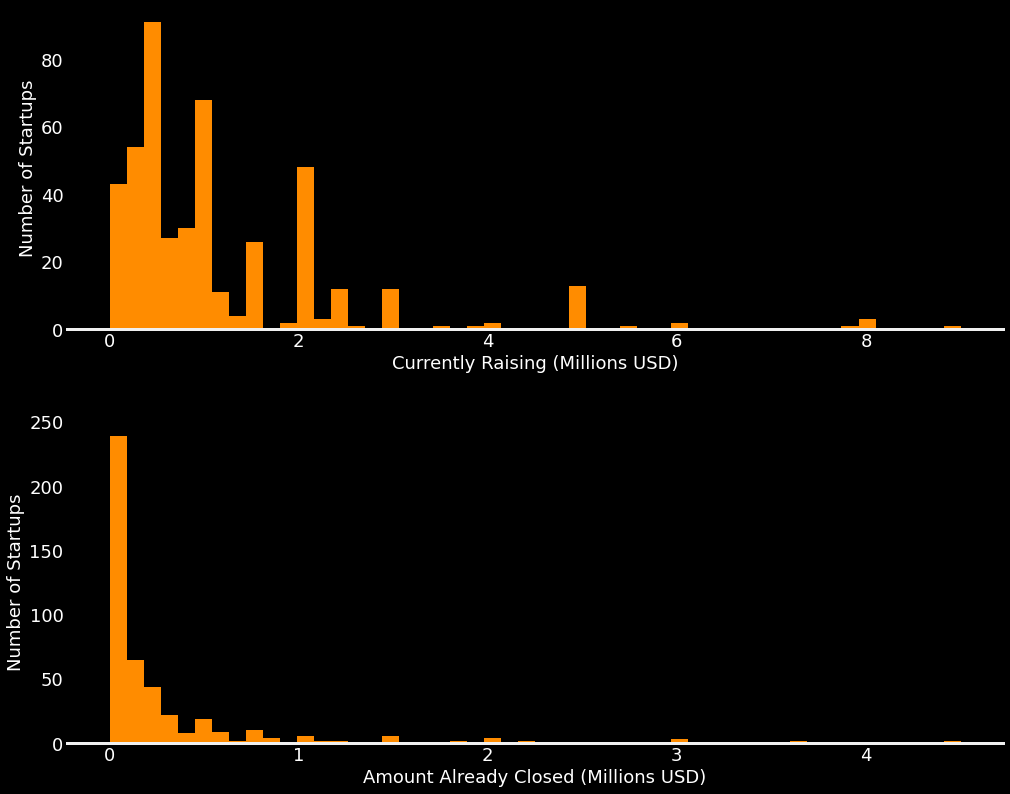

In [30]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (15,12))
fig.patch.set_facecolor("black")
plt.style.use("fivethirtyeight")
ax1.hist(currently_raising, color = "darkorange", bins = 50)
ax1.set_facecolor("black")
ax1.set_xlabel('Currently Raising (Millions USD)', fontsize = 18, color = "white")
ax1.set_ylabel('Number of Startups', fontsize = 18, color = "white")
ax1.tick_params(axis = "both", colors = "white", labelsize = 18)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.grid(False)

fig.patch.set_facecolor("black")
ax2.hist(already_closed, color = "darkorange", bins = 50)
ax2.set_facecolor("black")
ax2.set_xlabel('Amount Already Closed (Millions USD)', fontsize = 18, color = "White")
ax2.set_ylabel('Number of Startups', fontsize = 18, color = "White")
ax2.tick_params(axis = "both", colors = "White", labelsize = 18)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.grid(False)

plt.tight_layout(pad = 3)
plt.show()

Cool! Looks like PAA seems to follow the typical relationship between angel investors and startups seeking seed funding (of course, PAA is anything but a typical group of investors). The group isn't overreaching in terms of the size of startups that apply (e.g. successful, PE-ready startups).

## Since 2020, the majority of startups that have applied to PAA indicate that someone on their founding team identifies as male (e.g. founder, co-founder)

At the beginning of 2020, the application form that startups had to fill out in order to apply to PAA started inncluding the following question in relation to gender and sexuality: **"Does anyone on your founding team identify as (select all that apply):**.

Options included Male, Female, Gay, Non-Binary/Third Gender, Prefer not to say, and a "fill in your blank" answer (which peculiarly, all the groups that chose this option answered "Human being").

The graphs below show **(1)** the number of startups that have at least one team member that indicate these respective categories and **(2)** the percentage of startups that have at least one team member that indicate these respective categories.

In [31]:
#Check when gender data first appears in dataframe - since we know this never
#appears in 2018-2019, just check for the first instance it appears
first_gender=0
for i in range(len(df_data["Gender"])):
  if all('' == value for value in df_data["Gender"].iloc[i]):
    pass
  else:  
    first_gender = i
    break

#Next, there might be white space (e.g. no response) even when the
#gender section was active. Let's rename this to "no response".
for i in range(first_gender, len(df_data["Gender"])):
  if '' in df_data["Gender"].iloc[i]:
    df_data["Gender"].iloc[i] = ["No Response"]

#Looks like there are none!

#We now want to find unique instances of genders! We can do this by using
#a counter
copy = df_data["Gender"].iloc[first_gender:].copy()
values = copy.values
c = Counter()
for vals in values:
    for x in vals:
      #for each unique appearance, +1 count
        c[x] += 1

categories_gender = []
vals_gender = []
for i in c:
    categories_gender.append(i)
    vals_gender.append(c[i])

#Let's sort them to make our chart a bit more pleasant to look at
sorted_in = np.argsort(vals_gender)

vals_gender1 = []
categories_gender1 = []

for i in range(len(sorted_in)):
  vals_gender1.append(vals_gender[sorted_in[i]])
  categories_gender1.append(categories_gender[sorted_in[i]])


#Let's do percentages now!
percentages_gender = []
pie_categories = []

for i in range(len(vals_gender1)):
  blank = []
  blank1 = []
  percent = vals_gender1[i] / (len(df_data["Gender"]) - first_gender)
  blank.append(percent)
  blank.append(1 - percent)
  blank1.append( categories_gender1[i] + "\n  "+ str(round(percent * 100, 1)) + "%")
  blank1.append("")
  percentages_gender.append(blank)
  pie_categories.append(blank1)

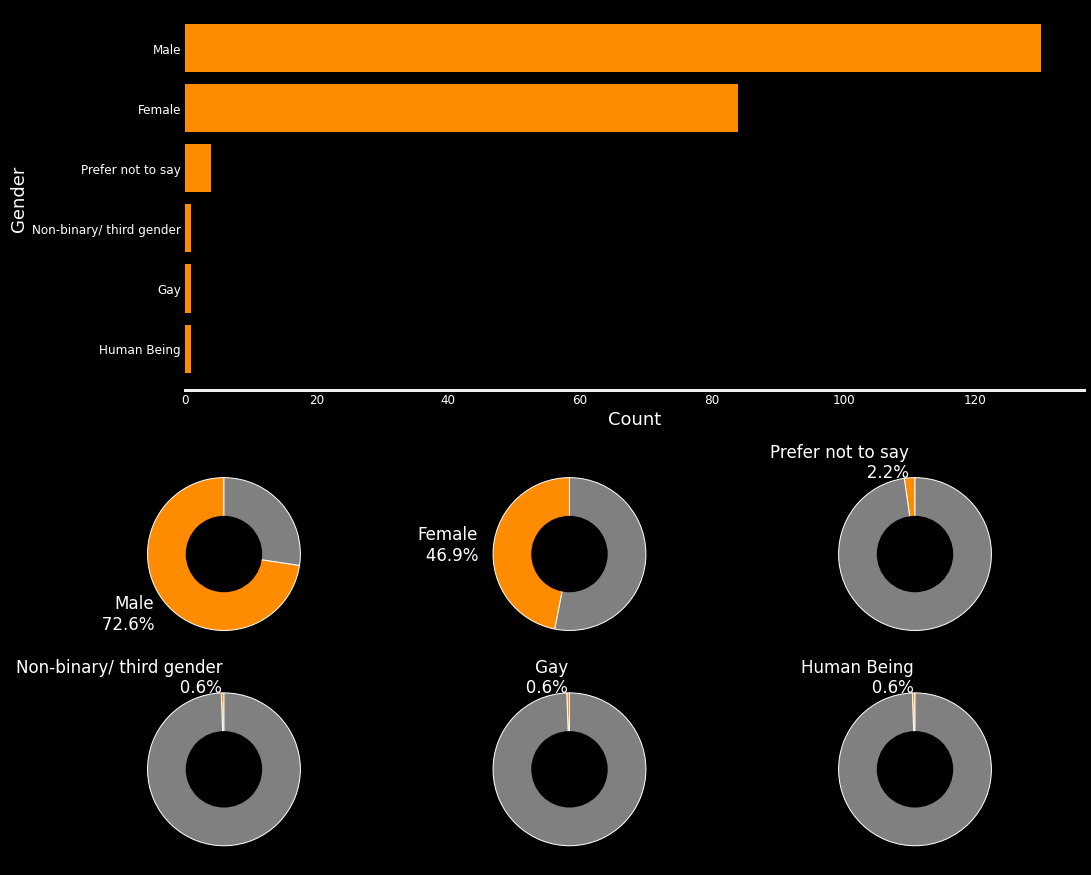

In [32]:
fig = plt.figure(constrained_layout=True, figsize=(15, 12))
fig.patch.set_facecolor("black")

subfigs = fig.subfigures(2, 1, wspace=0.07)
subfigs[0].set_facecolor("black")
ax1 = subfigs[0].subplots(1, 1)
ax1.set_facecolor("black")
ax1.barh(categories_gender1,vals_gender1, color = "darkorange")
ax1.set_xlabel('Count', fontsize = 18, color = "white")
ax1.set_ylabel('Gender', fontsize = 18, color = "white")
ax1.tick_params(axis = "both", colors = "white", labelsize = 12)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

ax1.grid(False)


subfigs[1].set_facecolor("black")
ax2 = subfigs[1].subplots(2, 3)
ax2 = ax2.ravel()

j = 5
colors = ["darkorange", "grey"]

data = {}
for i in range(6):
  data['circle%d' % i] = i

for i in range(6):
  patches, texts = ax2[i].pie(percentages_gender[j], labels = pie_categories[j], colors = colors, 
             startangle = 90, textprops={'size': 'large'}, wedgeprops={'edgecolor' : 'white', 
            'linewidth' : '1.0'}, labeldistance = 1.2)
  
  data[i] = plt.Circle((0, 0), 0.5, fc = 'black')
  ax2[i].add_patch(data[i])

  for i, patch in enumerate(patches):
    texts[i].set_color("white")

  #axs[i].axis('equal')
  j-=1

plt.show()

Hmm...the majority of startups that have applied to PAA since 2020 indicate that there is at least one male on their founding team. Perhaps this doesn't tell the whole picture. What we should probably focus on more is comparing the amount/precentage of startups that have at least one female on their founding team to the amount/percentage that have **no female** on their founding team. 

The Silicon Valley Bank (SVB) is a bank that assists in funding startups. In 2020, they released their Startup Outlook Report that includes statistics regarding a diverse range of topics including gender. They demonstrated through their surveys that **only 32% of startups had at least one (1) female founder**.$^{2}$

Here's their graphic that includes the founder gender statistic at the bottom:

![](svb.png)

We actually already have this statistic! Our code calculates the number of startups that indicate at least one female on the founding team as well as the percentage of startups. Just for good measure, let's calculate again and compare/graph:

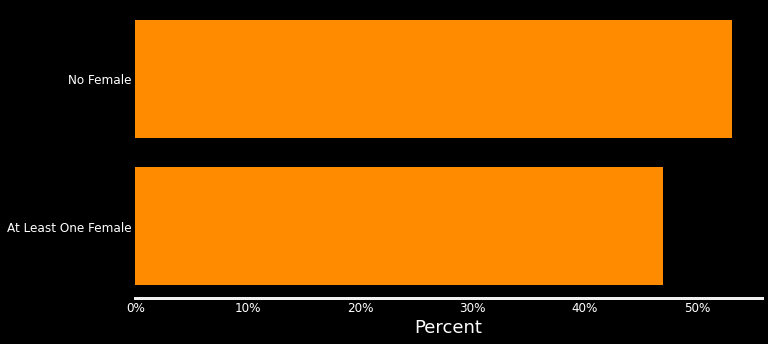

Percent startups with at least one female founding member:  46.927%
Percent startups with no female founding member:  53.073%


In [33]:
count = 0
for i in range(first_gender, len(df_data["Gender"])):
    if "Female" in df_data["Gender"].iloc[i]:
        count += 1

onefemale_percent = count / (len(df_data["Gender"]) - first_gender)
nofemale_percent = 1 - onefemale_percent

categories = ["At Least One Female", "No Female"]
data = [100*onefemale_percent, 100*nofemale_percent]

import matplotlib.ticker as mtick

fig, ax = plt.subplots(1, 1, figsize = (10, 5))
plt.style.use("fivethirtyeight")
fig.patch.set_facecolor("black")
ax.set_facecolor("black")

ax.barh(categories, data, color = "darkorange")
ax.set_xlabel('Percent', fontsize = 18, color = "white")
ax.tick_params(axis = "both", colors = "white", labelsize = 12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(False)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()
print("Percent startups with at least one female founding member: ", '{:.3%}'.format(onefemale_percent))
print("Percent startups with no female founding member: ", '{:.3%}'.format(nofemale_percent))

These percentages are pretty close! The calculated percentage of startups applied to PAA with at least one female founding member also matches the percentage we calculated above!

The calculated percentage of startups that have applied to PAA that have at least one female member on their founding team is **46.927%**, which is higher than the **32%** of startups that have at least one female founder according to SVB. Does this mean that PAA is good at promoting and encouraging startups with more diverse teams to apply?

It's worth reiterating that this data was **only introduced at the beginning of 2020**. One year of data is not enough to determine whether or not PAA successfully encourages startups with female founders to apply, even if the application pipeline shows this statistic to be higher than the overall market distribution of startups that have at least one female founder. 

We hope that starting the analysis now will serve as a benchmark for PAA (and potentially other angel groups!) to determine if the group is advocating enough for diverse leadership.

## Since 2020, the majority of startups that have applied to PAA indicate that someone on their founding team identifies as White (e.g. founder, co-founder)

At the beginning of 2020, another question was introduced to the application in regards to race/ethnicity: **"Does anyone on your founding team identify as (select all that apply):**.

The question had a range of possible selections including White, Asian, African-American/Black, Hispanic/Latinx and other answers, including one to specify one not listed.

The graphs below show **(1)** the number of startups that have at least one team member that indicate these respective categories and **(2)** the percentage of startups that have at least one team member that indicate these respective categories.

In [34]:
#Now for Race/Ethnicity
first_re = first_gender

#Once again, there could be white space!
for i in range(first_gender, len(df_data["Race/Ethnicity"])):
  if '' in df_data["Race/Ethnicity"].iloc[i]:
    df_data["Race/Ethnicity"].iloc[i] = ["No Response"]


for i in range(first_gender, len(df_data["Race/Ethnicity"])):
    for string in df_data["Race/Ethnicity"].iloc[i]:
        if "Asian" in string:
            index = df_data["Race/Ethnicity"].iloc[i].index(string)
            df_data["Race/Ethnicity"].iloc[i][index] = "Asian"

copy = df_data["Race/Ethnicity"].iloc[first_re:].copy()
values = copy.values
c = Counter()
for vals in values:
    for x in vals:
        c[x] += 1
  
#Let's see the counter and the most common; since there are a lot of choices
#as evident from the excel file, it may be smart to group into an "other" category

#We can see that there are a LOT of small numbers here: let's choose the value of
#10 to threshold (we can see that there are many below 10)

for i in c:
  if c[i] < 10 and i != "Asian":
    c["Other"] += c[i]

categories_re = []
vals_re = []
for i in c:
  if c[i] >= 10:
    categories_re.append(i)
    vals_re.append(c[i])

#Let's sort to make it prettier
sorted_in = np.argsort(vals_re)

vals_re1 = []
categories_re1 = []
for i in range(len(sorted_in)):
  vals_re1.append(vals_re[sorted_in[i]])
  categories_re1.append(categories_re[sorted_in[i]])

#now for percentages!

percentages_re = []
pie_re = []

for i in range(len(vals_re1)):
  blank = []
  blank1 = []
  percent = vals_re1[i] / (len(df_data["Race/Ethnicity"]) - first_re - 1)
  blank.append(percent)
  blank.append(1 - percent)
  blank1.append( categories_re1[i] + "\n  "+ str(round(percent * 100, 1)) + "%")
  blank1.append("")
  percentages_re.append(blank)
  pie_re.append(blank1)

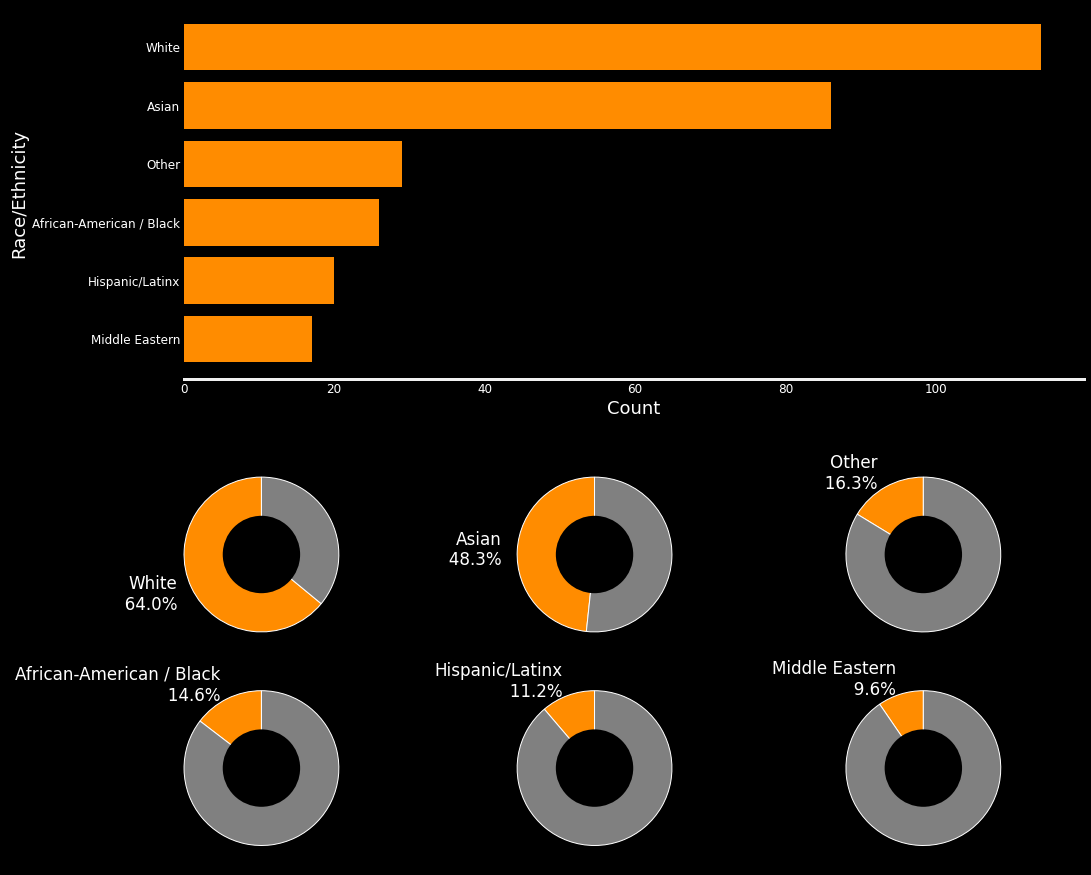

In [35]:
fig = plt.figure(constrained_layout=True, figsize = (15, 12))
fig.patch.set_facecolor("black")

subfigs = fig.subfigures(2, 1, hspace = 0.07)
subfigs[0].set_facecolor("black")

ax2 = subfigs[0].subplots(1, 1)
ax2.set_facecolor("black")
ax2.barh(categories_re1,vals_re1, color = "darkorange")
ax2.set_xlabel('Count', fontsize = 18, color = "white")
ax2.set_ylabel('Race/Ethnicity', fontsize = 18, color= "white")
ax2.tick_params(axis = "both", labelsize = 12, colors = "white")
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.grid(False)


subfigs[1].set_facecolor("black")
axs = subfigs[1].subplots(2, 3)
axs = axs.ravel()

j = 5
colors = ["darkorange", "grey"]

data = {}
for i in range(len(categories_re1)):
  data['circle%d' % i] = i

for i in range(len(categories_re1)):
  patches, texts = axs[i].pie(percentages_re[j], labels = pie_re[j], colors = colors, 
             startangle = 90, textprops={'size': 'large'}, wedgeprops={'edgecolor' : 'white', 
            'linewidth' : '1.0'}, labeldistance = 1.2)
  
  data[i] = plt.Circle((0, 0), 0.5, fc = 'black')
  axs[i].add_patch(data[i])

  for i, patch in enumerate(patches):
    texts[i].set_color("white")

  #axs[i].axis('equal')
  j-=1

plt.show()

It's not entirely unexpected that a majority of startups that have applied to PAA have someone on their founding team that identifies as White. It also isn't unexpected that the percentage of startups that have someone on their founding team that identifies as Asian follows closely at second.

The Kauffman Fellows Program reports that White and Asian executives in startups are drastically over-represented compared to the working-age US population, while Latinx and Black executives are drastically under-represented.$^{3}$

Here's their graphic:

![](kauffman.png)

It's extremely worth mentioning that the same Kauffman study also found that **more diverse founding teams have higher returns** and **raise more capital during later rounds of funding**.$^{4}$

Here are their graphics:

<img src="kauffman2.png" alt="Drawing" style="width: 600px;"/>

<img src="kauffman3.png" alt="Drawing" style="width: 600px;"/>

PAA already indicates on their website that the group aspires to invest in companies with diverse leadership. Perhaps, PAA should also **actively encourage** these types of startups to apply even more given these statistics!

We hope this analysis will serve as a benchmark for the future, especially given the data that diverse founding teams raise more money and generate higher returns in the future.

## Startups that have applied to PAA often register in Delaware and headquarter on the coasts

Many startups register in Delaware due to their favorable corporation laws.$^{5}$ It's reasonable to hypothesize that the startups that have applied to PAA will follow this same pattern.

Let's calculate!

In [36]:
copy = df_data["State Registered"].copy()
values = copy.values
c = Counter()
for val in values:
  c[val] += 1

categories_sr = []
vals_sr = []
for i in c:
    categories_sr.append(i)
    vals_sr.append(c[i])

sorted_in = np.argsort(vals_sr)

common_val = vals_sr[sorted_in[len(sorted_in) - 1]]
common_location = categories_sr[sorted_in[len(sorted_in) - 1]]
percent = common_val / len(copy)

print("Most common registration location is " + common_location + ", representing " + '{:.3%}'.format(percent) + " of startups")

Most common registration location is Delaware, representing 68.319% of startups


Yup, Delaware is the most common registration location. No surprises here!

How about where startups end up headquartering? PAA seems to advertise the most in the coasts just by looking at the events and email lists. Let's see if that hypothesis holds up.

The graphs below show **(1)** the number of startups headquartered at each labeled location and **(2)** the percentage of startups for each headquarters location.

In [37]:
#States headquartered
copy = df_data["State Headquartered"].copy()
values = copy.values
c = Counter()
for vals in values:
  c[vals] += 1

categories_sh = []
vals_sh = []
for i in c:
  if c[i] > 9 and i != "":
    categories_sh.append(i)
    vals_sh.append(c[i])

sorted_in = np.argsort(vals_sh)
categories_sh1 = []
vals_sh1 = []

for i in range(len(sorted_in)):
  vals_sh1.append(vals_sh[sorted_in[i]])
  categories_sh1.append(categories_sh[sorted_in[i]])

#now for percentages
percentages_sh = []
pie_sh = []
sum = 0

for i in range(len(vals_sh1)):
  percent = vals_sh1[i] / (len(df_data["State Headquartered"]))# - c[''])
  sum += percent
  percentages_sh.append(percent)
  pie_sh.append(categories_sh1[i])

percentages_sh.append(1 - sum)
pie_sh.append("Other")

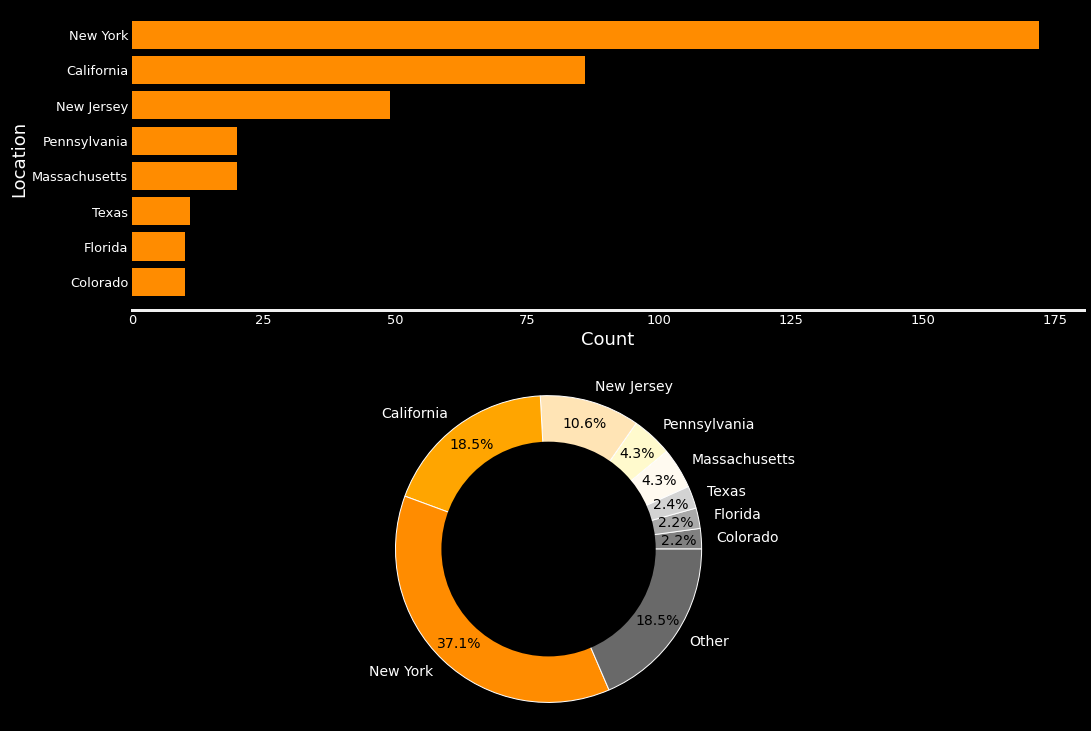

In [38]:
fig = plt.figure(constrained_layout = True, figsize = (15, 10))
fig.patch.set_facecolor("black")

subfigs = fig.subfigures(2, 1, hspace = 0.07)
subfigs[0].set_facecolor("black")

ax = subfigs[0].subplots(1, 1)
ax.set_facecolor("black")
ax.barh(categories_sh1,vals_sh1, color = "darkorange")
ax.set_xlabel('Count', fontsize = 18, color = "white")
ax.set_ylabel('Location', fontsize = 18, color= "white")
ax.tick_params(axis = "both", labelsize = 13, colors = "white")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(False)


subfigs[1].set_facecolor("black")
axs = subfigs[1].subplots(1, 1)

colors = ["grey", "darkgrey", "lightgrey", "floralwhite", "lemonchiffon", "moccasin",
          "orange", "darkorange", "dimgrey"]
#explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, .05]   
patches, texts, pct = axs.pie(percentages_sh, labels = pie_sh, colors = colors, 
            textprops={'size': 'medium'}, wedgeprops={'edgecolor' : 'white', 
            'linewidth' : '1.0'}, autopct = '%1.1f%%', pctdistance = 0.85)#, explode = explode)

for i, patch in enumerate(patches):
  texts[i].set_color('white')
data = plt.Circle((0, 0), 0.7, fc = 'black')
axs.add_patch(data)
axs.axis('equal')


plt.show()

The most common startup headquarter amongst those that have applied to PAA is **New York**, followed closely by **California**. This isn't entirely surprising especially considering PAA has chapters based primarily in these two states, so marketing is more efficiently done in these areas.

Below is an interactive map with all the startups that have applied to PAA. Clicking on each circle will allow the action of scrolling through all the startups that have applied from that location. There have been startups headquartered internationally, but including them in the map would have expanded the scope of the visual too much. In the future, it may be worth including these international startups once numbers increase.

**There may be some locations that have duplicate startups - we left them in because PAA allows applications for different cycles, and startups may have had time to grow and change.**

In [39]:
%%html
<iframe title="" aria-label="Map" id="datawrapper-chart-BDaMr" src="https://datawrapper.dwcdn.net/BDaMr/1/" scrolling="no" frameborder="0" style="width: 0; min-width: 100% !important; border: none;" height="549"></iframe><script type="text/javascript">!function(){"use strict";window.addEventListener("message",(function(e){if(void 0!==e.data["datawrapper-height"]){var t=document.querySelectorAll("iframe");for(var a in e.data["datawrapper-height"])for(var r=0;r<t.length;r++){if(t[r].contentWindow===e.source)t[r].style.height=e.data["datawrapper-height"][a]+"px"}}}))}();
</script>

## References and sources

$^{1}$https://www.investopedia.com/articles/personal-finance/102015/series-b-c-funding-what-it-all-means-and-how-it-works.asp

$^{2}$https://www.svb.com/globalassets/library/uploadedfiles/content/trends_and_insights/reports/startup_outlook_report/suo_global_report_2020-final.pdf

$^{3}$ https://www.kauffmanfellows.org/journal_posts/the-pipeline-myth-ethnicity-fund-managers

$^{4}$ https://www.kauffmanfellows.org/journal_posts/the-pipeline-myth-ethnicity-fund-managers